In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Selecting features and target
features = train_data.drop('SalePrice', axis=1)
target = train_data['SalePrice']

# Preprocessing: Fill missing values and standardize data
features.fillna(value=0, inplace=True)
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Validate the model
predictions = model.predict(X_val)
print(f'Mean Squared Error on validation set: {mean_squared_error(y_val, predictions)}')

# Preprocess the test data
test_features = test_data.drop('Id', axis=1)
test_features.fillna(value=0, inplace=True)
test_features = scaler.transform(test_features)

# Predicting the SalePrice for the test set
test_predictions = model.predict(test_features)

# Creating a DataFrame for submission
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})

# Save the submission file
submission.to_csv('house_prices_submission.csv', index=False)


ValueError: could not convert string to float: 'RL'

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

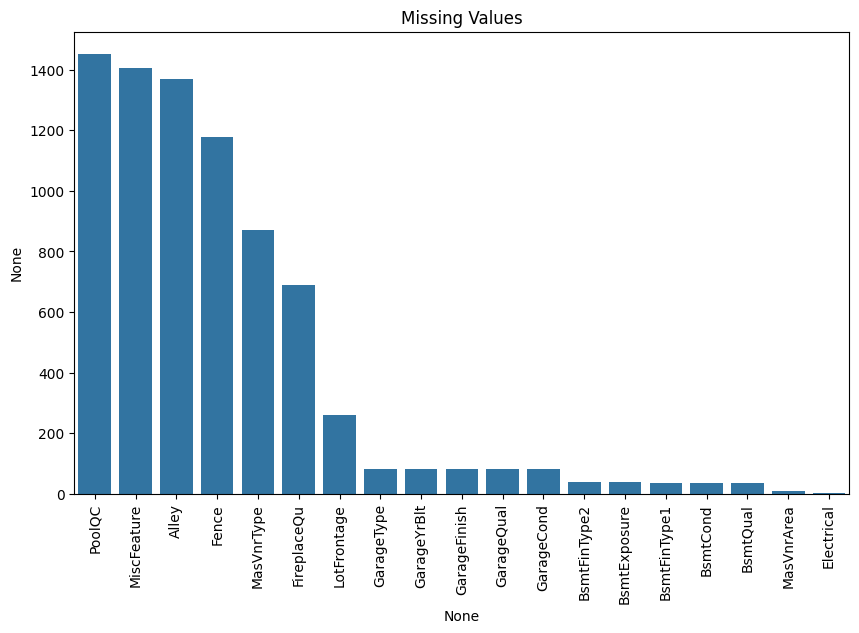

'SalePrice' column is present.


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- SalePrice


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Check the first few rows and column names
print(train.head())
print("Columns in the training dataset:", train.columns)

# Handle missing values
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values)
plt.xticks(rotation=90)
plt.title('Missing Values')
plt.show()

for col in missing_values.index:
    if train[col].dtype == 'object':
        train[col].fillna(train[col].mode()[0], inplace=True)
        test[col].fillna(test[col].mode()[0], inplace=True)
    else:
        train[col].fillna(train[col].median(), inplace=True)
        test[col].fillna(train[col].median(), inplace=True)

# Encode categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Align train and test datasets by the columns
train, test = train.align(test, join='left', axis=1)
test.fillna(0, inplace=True)

# Ensure SalePrice is still in the train DataFrame
if 'SalePrice' not in train.columns:
    raise KeyError("'SalePrice' column is missing from the training data.")
else:
    print("'SalePrice' column is present.")

# Split the data
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
test = scaler.transform(test)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Make predictions on test data
test_predictions = model.predict(test)

# Prepare submission file
submission = pd.DataFrame({
    'Id': pd.read_csv('test.csv')['Id'],
    'SalePrice': test_predictions
})
submission.to_csv('submission.csv', index=False)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

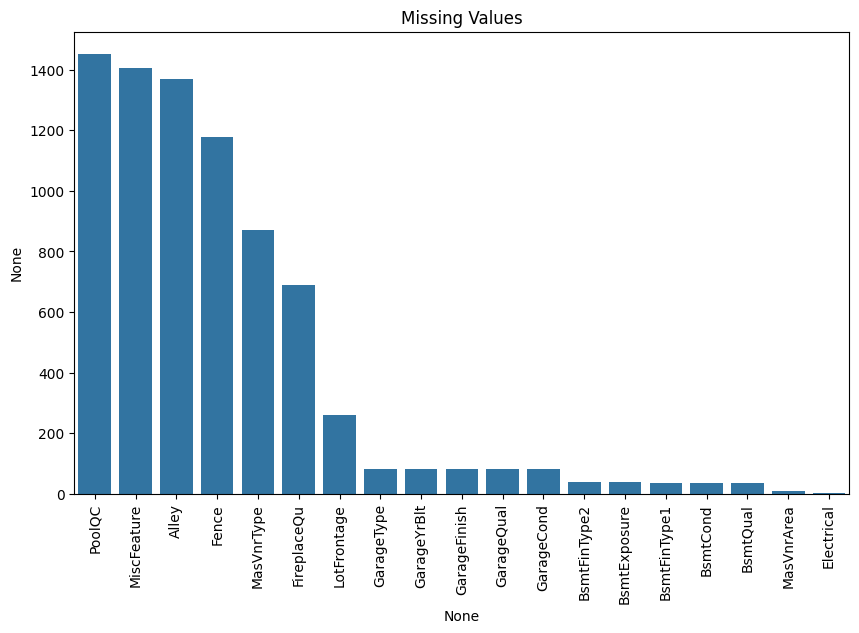

'SalePrice' column is present.


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- SalePrice


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Check the first few rows and column names
print(train.head())
print("Columns in the training dataset:", train.columns)

# Handle missing values
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values)
plt.xticks(rotation=90)
plt.title('Missing Values')
plt.show()

for col in missing_values.index:
    if train[col].dtype == 'object':
        train[col].fillna(train[col].mode()[0], inplace=True)
        test[col].fillna(test[col].mode()[0], inplace=True)
    else:
        train[col].fillna(train[col].median(), inplace=True)
        test[col].fillna(test[col].median(), inplace=True)

# Encode categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Ensure SalePrice is not in the test DataFrame
test.drop(columns=['SalePrice'], errors='ignore', inplace=True)

# Align train and test datasets by the columns
train, test = train.align(test, join='left', axis=1)
test.fillna(0, inplace=True)

# Ensure SalePrice is still in the train DataFrame
if 'SalePrice' not in train.columns:
    raise KeyError("'SalePrice' column is missing from the training data.")
else:
    print("'SalePrice' column is present.")

# Split the data
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
test_scaled = scaler.transform(test)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Make predictions on test data
test_predictions = model.predict(test_scaled)

# Prepare submission file
submission = pd.DataFrame({
    'Id': pd.read_csv('test.csv')['Id'],
    'SalePrice': test_predictions
})
submission.to_csv('submission.csv', index=False)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

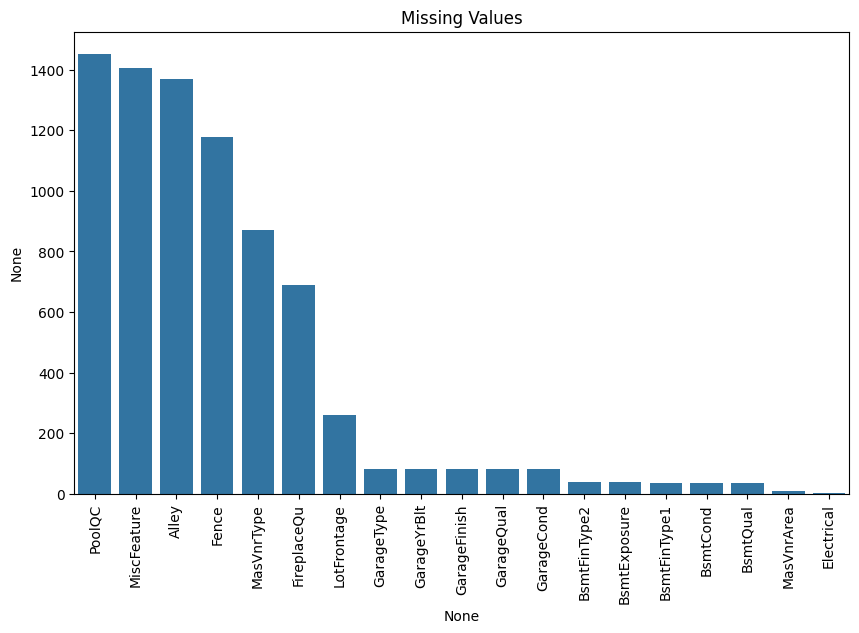

'SalePrice' column is present.
Root Mean Squared Error: 29534.810286315937


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Check the first few rows and column names
print(train.head())
print("Columns in the training dataset:", train.columns)

# Handle missing values
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values)
plt.xticks(rotation=90)
plt.title('Missing Values')
plt.show()

for col in missing_values.index:
    if train[col].dtype == 'object':
        train[col].fillna(train[col].mode()[0], inplace=True)
        test[col].fillna(test[col].mode()[0], inplace=True)
    else:
        train[col].fillna(train[col].median(), inplace=True)
        test[col].fillna(test[col].median(), inplace=True)

# Encode categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Align train and test datasets by the columns
train, test = train.align(test, join='left', axis=1)

# Ensure SalePrice is not in the test DataFrame
if 'SalePrice' in test.columns:
    test.drop(columns=['SalePrice'], inplace=True)

# Fill any remaining missing values in test
test.fillna(0, inplace=True)

# Ensure SalePrice is still in the train DataFrame
if 'SalePrice' not in train.columns:
    raise KeyError("'SalePrice' column is missing from the training data.")
else:
    print("'SalePrice' column is present.")

# Split the data
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
test_scaled = scaler.transform(test)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Make predictions on test data
test_predictions = model.predict(test_scaled)

# Prepare submission file
submission = pd.DataFrame({
    'Id': pd.read_csv('test.csv')['Id'],
    'SalePrice': test_predictions
})
submission.to_csv('submission.csv', index=False)


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Separate target from predictors
y = train_data.SalePrice
X = train_data.drop(['SalePrice'], axis=1)

# Select numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Select categorical columns with relatively low cardinality (convenient threshold of 10)
categorical_cols = [cname for cname in X.columns if
                    X[cname].nunique() < 10 and 
                    X[cname].dtype == "object"]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model
model = LinearRegression()

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

# Split data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
print('Model has been trained and evaluated.')

# Preprocess the test data
test_X = test_data.drop(['Id'], axis=1)
final_predictions = my_pipeline.predict(test_X)

# Save the predictions
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': final_predictions})
output.to_csv('submission.csv', index=False)

print('Predictions have been saved to submission.csv')


Model has been trained and evaluated.


KeyError: "['Id'] not in index"

In [8]:
# Load the test data
test_data = pd.read_csv('test.csv')

# Check if 'Id' is a column
if 'Id' in test_data.columns:
    # Proceed with your code, 'Id' is a column
    final_predictions = my_pipeline.predict(test_data.drop(['Id'], axis=1))
else:
    # 'Id' is not a column, check if it's the index
    if 'Id' in test_data.index:
        # Reset the index to make 'Id' a column
        test_data.reset_index(inplace=True)
        final_predictions = my_pipeline.predict(test_data.drop(['Id'], axis=1))
    else:
        # 'Id' is neither a column nor an index, raise an informative error
        raise KeyError("The 'Id' column is missing from your dataset.")

# Save the predictions
output = pd.DataFrame({'Id': test_data['Id'],
                       'SalePrice': final_predictions})
output.to_csv('submission.csv', index=False)


KeyError: "['Id'] not in index"

In [10]:
# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Print out the column names for both train and test datasets
print("Training data columns:", train_data.columns.tolist())
print("Test data columns:", test_data.columns.tolist())


Training data columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch

In [11]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

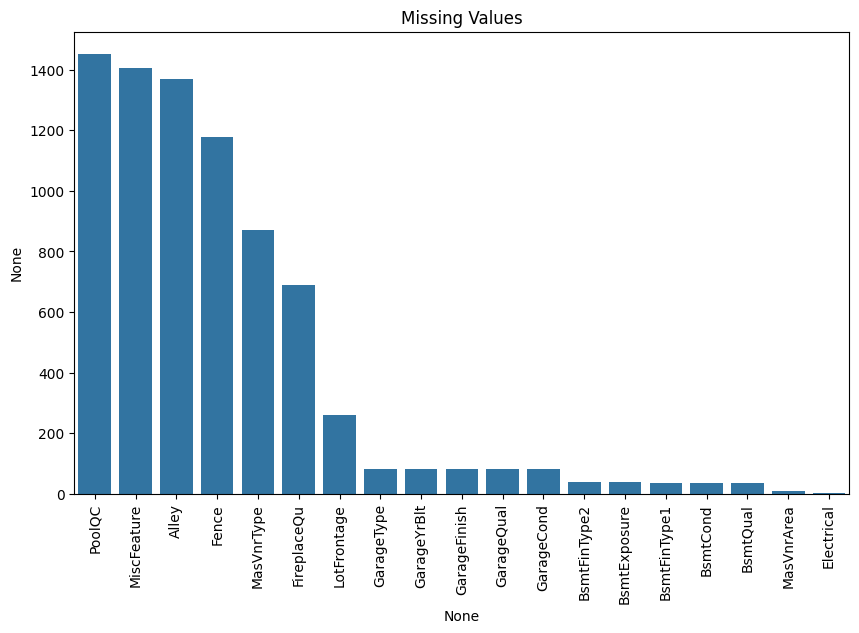

'SalePrice' column is present.
Root Mean Squared Error: 29534.810286315937
Submission file created successfully!


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Save the 'Id' column from the test dataset
test_ids = test['Id']

# Check the first few rows and column names
print(train.head())
print("Columns in the training dataset:", train.columns)

# Handle missing values
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values)
plt.xticks(rotation=90)
plt.title('Missing Values')
plt.show()

for col in missing_values.index:
    if train[col].dtype == 'object':
        train[col].fillna(train[col].mode()[0], inplace=True)
        test[col].fillna(test[col].mode()[0], inplace=True)
    else:
        train[col].fillna(train[col].median(), inplace=True)
        test[col].fillna(test[col].median(), inplace=True)

# Encode categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Align train and test datasets by the columns
train, test = train.align(test, join='left', axis=1)

# Ensure SalePrice is not in the test DataFrame
if 'SalePrice' in test.columns:
    test.drop(columns=['SalePrice'], inplace=True)

# Fill any remaining missing values in test
test.fillna(0, inplace=True)

# Ensure SalePrice is still in the train DataFrame
if 'SalePrice' not in train.columns:
    raise KeyError("'SalePrice' column is missing from the training data.")
else:
    print("'SalePrice' column is present.")

# Split the data
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
test_scaled = scaler.transform(test)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Make predictions on test data
test_predictions = model.predict(test_scaled)

# Prepare submission file
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_predictions
})
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")
